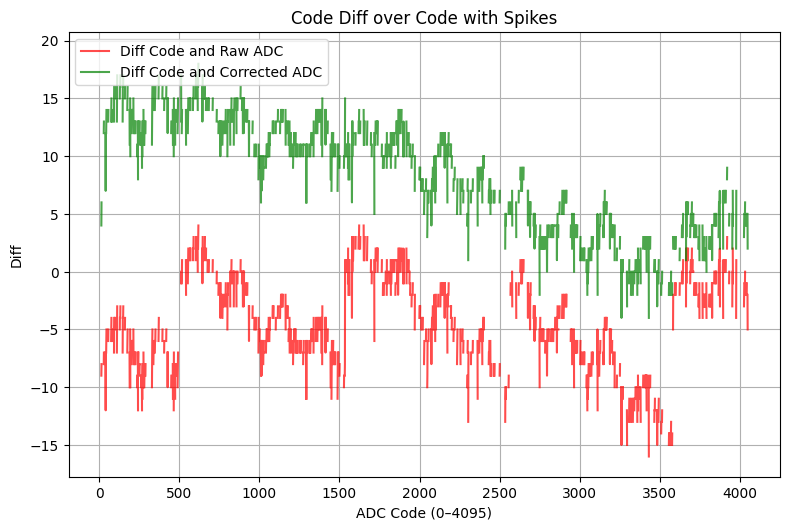

In [8]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def csvShow(df):
    # X軸の定義（12bit範囲）
    x_axis = np.arange(4096)

    # 各値に対応した Y軸配列を作る
    diff_mapped = np.full(4096, np.nan)  # 空配列（NaNで初期化）
    cor_diff_mapped = np.full(4096, np.nan)  # 空配列（NaNで初期化）
    dac_out_mapped = np.full(4096, np.nan)
    adc_in_mapped = np.full(4096, np.nan)
    cor_adc_in_mapped = np.full(4096, np.nan)
    adc_diff_mapped = np.full(4096, np.nan)

    # adc_in を X軸位置として diff 値を割り当て
    for i in range(len(df)):
        adc_val = df['raw_adc'][i]
        if 0 <= adc_val < 4096:
            diff_mapped[adc_val] = df['raw_diff'][i]
            cor_diff_mapped[adc_val] = df['cor_diff'][i]
            cor_adc_in_mapped[adc_val] = df['cor_adc'][i]
            adc_diff_mapped[adc_val] = (df['raw_adc'][i] - df['cor_adc'][i])
            dac_out_mapped[adc_val] = df['out'][i]
            adc_in_mapped[adc_val] = adc_val  # 同じ値になるけど整列目的

    # スパイク系列の生成（同様に4096スケール）
    spikes = [512, 1536, 2560, 3584]
    spike_values = np.zeros(4096)
    for i in spikes:
        spike_values[i] = 8.9

    # グラフ描画
    plt.figure(figsize=(8, 10))

    # ━━ 上段 ━━ DAC/ADC系列表示 + スパイク
    # ax1 = plt.subplot(2, 1, 1)
    # ax1.plot(x_axis, dac_out_mapped, label='Code', color='red', alpha=0.7)
    # ax1.plot(x_axis, adc_in_mapped, label='Raw ADC',  color='green', alpha=0.7)
    # ax1.plot(x_axis, cor_adc_in_mapped, label='Corrected Input', color='blue', alpha=0.7)
    # ax1.set_xlabel('ADC Code (0–4095)')
    # ax1.set_ylabel('Value')
    # ax1.set_title('ADC over Code with Spikes')
    # ax1.grid(True)
    # ax1.legend(loc='upper left')

    # ax1_r = ax1.twinx()
    # ax1_r.plot(x_axis, spike_values, label='Spikes', color='magenta', alpha=0.4)
    # ax1_r.set_ylabel('Spike Value')
    # ax1_r.legend(loc='lower right')

    # ━━ 下段 ━━ diff + スパイク
    ax2 = plt.subplot(2, 1, 2)
    ax2.plot(x_axis, diff_mapped, label='Diff Code and Raw ADC', color='red', alpha=0.7)
    ax2.plot(x_axis, cor_diff_mapped, label='Diff Code and Corrected ADC', color='green', alpha=0.7)
    # ax2.plot(x_axis, adc_diff_mapped, label='Diff Raw ADC and Corrected ADC', color='blue', alpha=0.7)
    ax2.set_xlabel('ADC Code (0–4095)')
    ax2.set_ylabel('Diff')
    ax2.set_title('Code Diff over Code with Spikes')
    ax2.grid(True)
    ax2.legend(loc='upper left')

    # ax2_r = ax2.twinx()
    # ax2_r.plot(x_axis, spike_values, label='Spikes', color='magenta', alpha=0.4)
    # ax2_r.set_ylabel('Spike Value')
    # ax2_r.legend(loc='lower right')

    plt.tight_layout()
    plt.show()

    # csv_data = {
    #     'ADC_Code': x_axis,
    #     'DAC_Output': dac_out_mapped,
    #     'ADC_Input': adc_in_mapped,
    #     'Diff': diff_mapped,
    #     'Spikes': spike_values
    # }

    # DataFrame化
    # df_out = pd.DataFrame(csv_data)

    # CSVとして保存（必要に応じてファイル名変更可）
    # df_out.to_csv('adc_graph_data.csv', index=False)

# データ読み込み
df = pd.read_csv('0507000_33062.csv', skiprows=1)
csvShow(df)


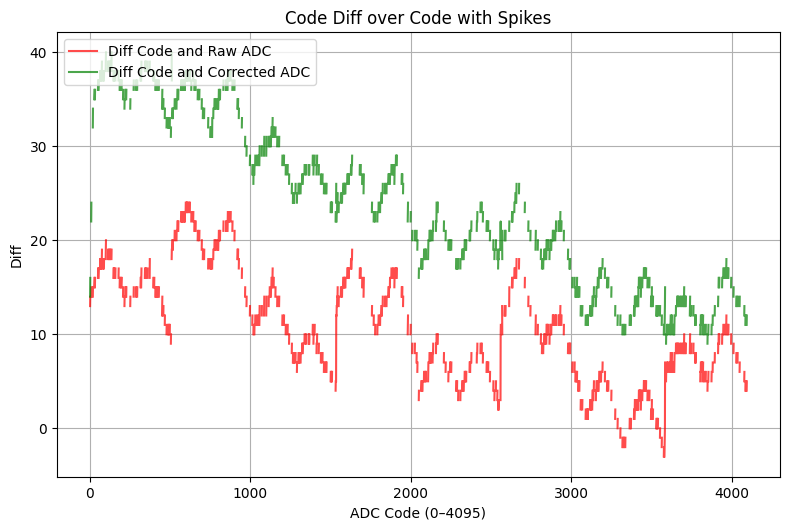

In [9]:
# データ読み込み
df = pd.read_csv('0507001_32611.csv', skiprows=1)
csvShow(df)

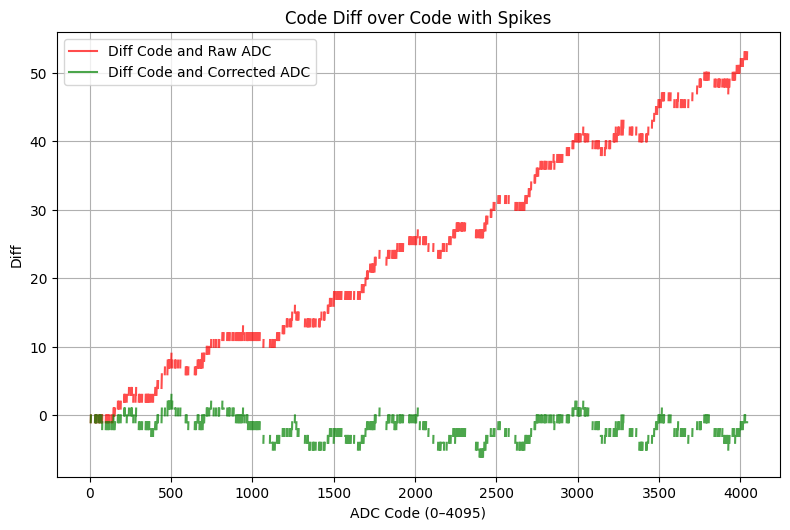

In [7]:
# データ読み込み
df = pd.read_csv('RA4M1_33128.csv', skiprows=1)
csvShow(df)

In [56]:
vref = 3.2989

_input_max = 5.0
_adc_input_max = 189000.0 / (100000.0 + 189000.0) * _input_max
_voctInputRatio = _input_max / _adc_input_max
_adcInputRatio = vref / _adc_input_max
